In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(sum(map(ord, "palettes")))
sns.set()
sns.set_style("darkgrid")

In [61]:
with np.load('results_0.npz') as f:
    print (f.keys())

['d_logits', 's_logits', 'lbls', 'adv_sup_acc', 'adv_sup_acc_unf', 'correct_uncertainty', 'incorrect_uncertainty', 'adv_acc']


In [54]:
def true_positive(prob_vec, label):
    return int(np.argmax(prob_vec[1:]) == np.argmax(label))

In [70]:
adv_sup_accs = []
adv_sup_accs_unf = []
s_accs = []
d_accs = []
class_0_prob_on_correct = []
class_0_prob_on_incorrect = []
for i in range(0,4000,100):
    with np.load('results_'+str(i)+'.npz') as f:
        adv_sup_accs.append(f['adv_sup_acc'])
        adv_sup_accs_unf.append(f['adv_sup_acc_unf'])
        
        s_results = np.array([true_positive(p,l) for (p,l) in zip(f['s_logits'], f['lbls'])])
        d_results = np.array([true_positive(p,l) for (p,l) in zip(f['d_logits'], f['lbls'])])
    
        s_accs.append((s_results[s_results>0]).shape[0]/s_results.shape[0])
        d_accs.append((d_results[d_results>0]).shape[0]/s_results.shape[0])
        
        class_0_prob_on_correct.append(f['correct_uncertainty'])
        class_0_prob_on_incorrect.append(f['incorrect_uncertainty'])

In [88]:
x = range(1,41)

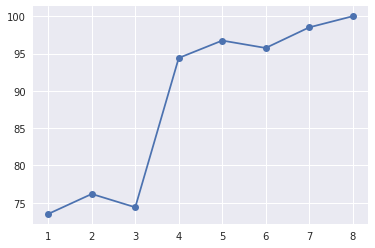

In [89]:
plt.plot(x,adv_sup_accs,'o-')

(0, 100)

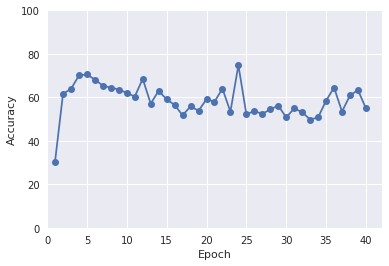

In [90]:
plt.plot(x,adv_sup_accs_unf,'o-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0,42])
plt.ylim([0,100])

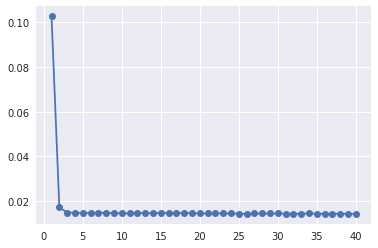

In [91]:
plt.plot(x,s_accs,'o-')

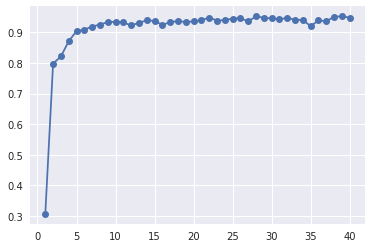

In [92]:
plt.plot(x,d_accs,'o-')

In [75]:
d_accs[-1]

0.9476161858974359

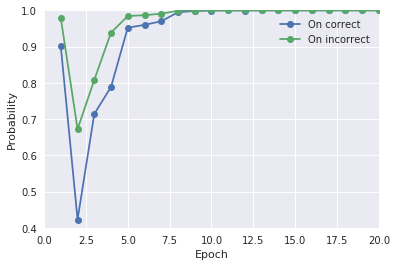

In [93]:
plt.plot(x,class_0_prob_on_correct,'o-',label='On correct')
plt.plot(x,class_0_prob_on_incorrect,'o-',label='On incorrect' )
plt.xlabel('Epoch')
plt.ylabel('Probability')
plt.xlim([0,20])
plt.ylim([0.4,1])
plt.legend()